<a href="https://colab.research.google.com/github/dennistay1981/Resources/blob/main/Conference%20presentations/ALAPP%202024/ALAPP%202024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [21]:
!pip install pmdarima
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

Import and plot data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dennistay1981/Resources/refs/heads/main/Conference%20presentations/ALAPP%202024/LIWC.csv')

plt.figure(figsize=(12, 6))
plt.plot(data.iloc[:,2:6])
plt.legend(data.columns[2:6])
plt.title('LIWC summary variables')

Compute and plot (P)ACF for specified feature/series

In [ ]:
series=data['Tone']

lag_acf = acf(series, nlags=20)
lag_pacf = pacf(series, nlags=20, method='ols')


plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_acf(series, lags=20, ax=plt.gca())
plt.subplot(122)
plot_pacf(series, lags=20, method='ols', ax=plt.gca())
plt.show()

Auto fit best ARIMA model

In [ ]:
model = auto_arima(series, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, d=None,seasonal=True,
                      start_P=0, D=None, trace=True,  error_action='ignore', suppress_warnings=True,
                      stepwise=True)

print(model.summary())

predictions = model.predict_in_sample()


Fit a model manually and predict

In [50]:
model=sm.tsa.SARIMAX(series,order=(1,0,0),seasonal_order = (0,0,0,0), trend='c').fit()   #seasonal_order = (P, D, Q, m)
model.summary()

predictions= model.get_prediction(start=0, end=len(series)-1).predicted_mean

Plot data vs. predictions and evaluate model

In [ ]:
#Create axes
x1 =np.arange(0, len(series))
x3= np.arange(0, len(series))

plt.plot(x3,series, label="actual", color='dodgerblue')
plt.plot(x1,predictions, label="predictions",color='orange')
plt.legend()
plt.title('Actual vs. predicted')
plt.show()


print("RMSE:", np.sqrt(np.mean((series -predictions) ** 2)))
print("MAPE:", mean_absolute_percentage_error(series, predictions) )
print("R2:", r2_score(series, predictions))
print("AIC:", model.aic())

Remove first value of series and predictions if the latter is zero, and then replot/re-evaluate

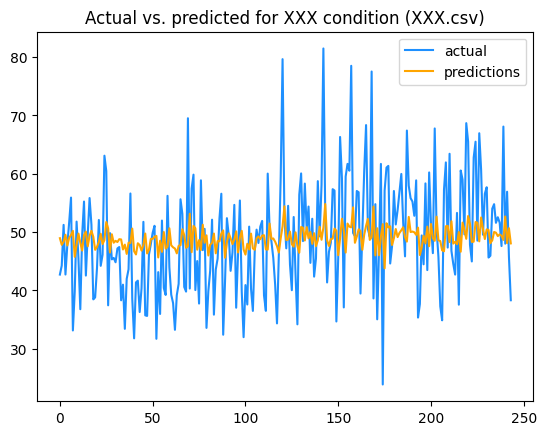

RMSE: 9.454544315624197
MAPE: 0.16094083150500083
R2: 0.03175749142934259
AIC: 1801.0971440630528


In [20]:
predictions = predictions[1:]
series = series[1:]


x1 =np.arange(0, len(series))
x3= np.arange(0, len(series))

plt.plot(x3,series, label="actual", color='dodgerblue')
plt.plot(x1,predictions, label="predictions",color='orange')
plt.legend()
plt.title('Actual vs. predicted)')
plt.show()


print("RMSE:", np.sqrt(np.mean((series -predictions) ** 2)))
print("MAPE:", mean_absolute_percentage_error(series, predictions) )
print("R2:", r2_score(series, predictions))
print("AIC:", model.aic())